# Machine Learning 2

Our dataset is from Kaggle: "Heart Disease Dataset" by *Mazaharul Hasnine Mirza

Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

We have previously tried out using upsampled data to build our machine learning model for `HEART_STROKE` prediction. Now, we do not upsample the data, instead we use two models from imblearn: BalancedBaggingClassifier & BalancedRandomForestClassifier, to perform our prediction.

We will use the ohe-ed data from the previous ipynb file, which categorical variables are encoded as one-hot numeric arrays.

Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes. Link to learn more about imblearn: https://imbalanced-learn.org/stable/

The two models mentioned above are from `imblearn` `ensemble` library.

`Ensemble` learning gives credence to the idea of the “wisdom of crowds”, which suggests that the decision-making of a larger group of people is typically better than that of an individual expert. Similarly, `ensemble` learning refers to a group (or `ensemble`) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a base or weak learner, may not perform well individually due to high variance or high bias. However, when weak learners are aggregated, they can form a strong learner, as their combination reduces bias or variance, yielding better model performance.

# Data Preparation

Let's start by importing and installing the essential python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set
!pip install imblearn

We now import the file **heart_dis_cln.csv** which contains the cleaned data, prepared in our previous notebook.

In [2]:
heart_dis_cln = pd.read_csv('heart_dis_cln.csv')
heart_dis_cln

,Unnamed: 0,GENDER,AGE,AGEGROUP,EDUCATION,CURRENT_SMOKER,CIGS_PER_DAY,BP_MEDICATION,PREV_STROKE,PREV_HYPERTENSION,DIABETES,TOT_CHOLESTEROL,SYSTOLIC_BP,DIASTOLIC_BP,BMI,HEART_RATE,GLUCOSE_LEVEL,HEART_STROKE
0,0,Male,39,30-39,Postgraduate,False,0.0,False,False,False,False,195.0,106.0,70.0,26.97,80.0,77.0,False
1,1,Female,46,40-49,Primary School,False,0.0,False,False,False,False,250.0,121.0,81.0,28.73,95.0,76.0,False
2,2,Male,48,40-49,Uneducated,True,20.0,False,False,False,False,245.0,127.5,80.0,25.34,75.0,70.0,False
3,3,Female,61,60-69,Graduate,True,30.0,False,False,True,False,225.0,150.0,95.0,28.58,65.0,103.0,True
4,4,Female,46,40-49,Graduate,True,23.0,False,False,False,False,285.0,130.0,84.0,23.10,85.0,85.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4232,Male,68,60-69,Uneducated,False,0.0,False,False,True,False,176.0,168.0,97.0,23.14,60.0,79.0,True
3649,4233,Male,50,50-59,Uneducated,True,1.0,False,False,True,False,313.0,179.0,92.0,25.97,66.0,86.0,True
3650,4234,Male,51,50-59,Graduate,True,43.0,False,False,False,False,207.0,126.5,80.0,19.71,65.0,68.0,False
3651,4235,Female,48,40-49,Primary School,True,20.0,NotDefined,False,False,False,248.0,131.0,72.0,22.00,84.0,86.0,False


Below are the functions for conversion of data type for use when neccessary.

In [3]:
def to_category(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("category")
    
def to_float64(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float64")

def to_int32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("int32")

We now convert our numerical data to type 'float64' for consistency.

In [4]:
to_float64(heart_dis_cln, ["CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL", "AGE"])

# OneHotEncoder ( For Encoding Of Categorical Variables)

`OneHotEncoder` encodes categorical features as a one-hot numeric array. It converts each categorical value into a new column and assigns a 1 or 0 (representation for true/false) value to the column.

We can find out more from these links:
-  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
-  https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

We first need to import the essential libraries
> OneHotEncoder: Encode categorical features as a one-hot numeric array. 


Then, we create a `OneHotEncoder` object and fit it with our data. 

The data types of the categorical variables after encoding are shown below.

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

heart_dis_cln_cat = heart_dis_cln[["AGEGROUP", "GENDER", "EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES"]]
ohe.fit(heart_dis_cln_cat)

heart_dis_cln_cat_ohe=pd.DataFrame(ohe.transform(heart_dis_cln_cat).toarray(), 
                               columns=ohe.get_feature_names_out(heart_dis_cln_cat.columns))

heart_dis_cln_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGEGROUP_30-39            3653 non-null   float64
 1   AGEGROUP_40-49            3653 non-null   float64
 2   AGEGROUP_50-59            3653 non-null   float64
 3   AGEGROUP_60-69            3653 non-null   float64
 4   AGEGROUP_70-79            3653 non-null   float64
 5   GENDER_Female             3653 non-null   float64
 6   GENDER_Male               3653 non-null   float64
 7   EDUCATION_Graduate        3653 non-null   float64
 8   EDUCATION_NotDefined      3653 non-null   float64
 9   EDUCATION_Postgraduate    3653 non-null   float64
 10  EDUCATION_Primary School  3653 non-null   float64
 11  EDUCATION_Uneducated      3653 non-null   float64
 12  CURRENT_SMOKER_False      3653 non-null   float64
 13  CURRENT_SMOKER_True       3653 non-null   float64
 14  BP_MEDIC

Now, we combine the dataframes of **1)** OneHotEncoded categorical variables, **2)** numerical variables and **3)** response variable ie. "HEART_STROKE" into one common dataframe ie. **heart_dis_cln_ohe**.

In [6]:
heart_dis_cln_num = heart_dis_cln[["AGE","CIGS_PER_DAY","TOT_CHOLESTEROL","SYSTOLIC_BP","DIASTOLIC_BP","BMI","HEART_RATE","GLUCOSE_LEVEL"]]
heart_dis_cln_rspd = heart_dis_cln["HEART_STROKE"]
heart_dis_cln_ohe=pd.concat([heart_dis_cln_num, heart_dis_cln_cat_ohe, heart_dis_cln_rspd],
                       sort=False, axis=1).reindex(index=heart_dis_cln_num.index)

heart_dis_cln_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       3653 non-null   float64
 1   CIGS_PER_DAY              3653 non-null   float64
 2   TOT_CHOLESTEROL           3653 non-null   float64
 3   SYSTOLIC_BP               3653 non-null   float64
 4   DIASTOLIC_BP              3653 non-null   float64
 5   BMI                       3653 non-null   float64
 6   HEART_RATE                3653 non-null   float64
 7   GLUCOSE_LEVEL             3653 non-null   float64
 8   AGEGROUP_30-39            3653 non-null   float64
 9   AGEGROUP_40-49            3653 non-null   float64
 10  AGEGROUP_50-59            3653 non-null   float64
 11  AGEGROUP_60-69            3653 non-null   float64
 12  AGEGROUP_70-79            3653 non-null   float64
 13  GENDER_Female             3653 non-null   float64
 14  GENDER_M

We have to change the data type of `HEART_STROKE` column from bool to int32 for further use in our models later.

In [7]:
heart_dis_cln_ohe["HEART_STROKE"] = heart_dis_cln_ohe["HEART_STROKE"].astype(int)
heart_dis_cln_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       3653 non-null   float64
 1   CIGS_PER_DAY              3653 non-null   float64
 2   TOT_CHOLESTEROL           3653 non-null   float64
 3   SYSTOLIC_BP               3653 non-null   float64
 4   DIASTOLIC_BP              3653 non-null   float64
 5   BMI                       3653 non-null   float64
 6   HEART_RATE                3653 non-null   float64
 7   GLUCOSE_LEVEL             3653 non-null   float64
 8   AGEGROUP_30-39            3653 non-null   float64
 9   AGEGROUP_40-49            3653 non-null   float64
 10  AGEGROUP_50-59            3653 non-null   float64
 11  AGEGROUP_60-69            3653 non-null   float64
 12  AGEGROUP_70-79            3653 non-null   float64
 13  GENDER_Female             3653 non-null   float64
 14  GENDER_M

# BalancedBaggingClassifier
The BalancedBaggingClassifier is a `Bagging` classifier equiped with additional **balancing**. The implementation of `Bagging` is similar to the scikit-learn implementation, with the inclusion of an additional step to **balance the training set** at fit time using a given sampler.

We can find out more at: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedBaggingClassifier.html

What is `Bagging`?

`Bagging` (also known as **bootstrap aggregation**) is an `ensemble` learning method that is commonly used to reduce variance within a noisy dataset. In this model, a **random** sample of data in a training set is **selected with replacement**—meaning that the individual data points can be **chosen more than once**. After several data samples are generated, these weak models are then **trained independently**, and depending on the **type of task—regression or classification**, for example—the average or majority of those predictions yield **a more accurate estimate**.

We can once again find out more at: https://www.ibm.com/cloud/learn/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once.

We import the essential libraries.

>train_test_split: Split arrays or matrices into random train and test subsets.
>
>DecisionTreeClassifier: A decision tree classifier.
>
>plot_tree: Plot a decision tree.
>
>confusion_matrix: Compute confusion matrix to evaluate the accuracy of a classification.
>
>BalancedBaggingClassifier: A Bagging classifier with additional balancing.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier

In [56]:
y=pd.DataFrame(heart_dis_cln_ohe["HEART_STROKE"])
X=pd.DataFrame(heart_dis_cln_ohe.drop("HEART_STROKE", axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) #split the data into train:test=8:2

Create a `BalancedBaggingClassifier` object with the following parameters:

- base_estimator: DecisionTreeClassifier
- sampling_strategy: auto (equivalent to 'not minority')
- replacement: False
- random_state: None
- Leaving other parameters as default

# Train Data

We first fit the model using **train** data

In [57]:
bbc=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                             sampling_strategy='auto',
                             replacement=False,
                             random_state=None)

bbc.fit(X_train, y_train.HEART_STROKE.ravel())

C:\Users\Daryl\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier())

Then, we predict the **train** data using the model that we have trained earlier. Below is the **heatmap of confusion matrix** to show what each box of the confusion matrix represents.


| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

<AxesSubplot:>

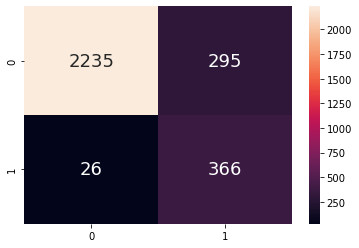

In [58]:
y_train_pred=bbc.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [59]:
print("Train Data")
print("Accuracy  :\t", bbc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()

Train Data
Accuracy  :	 0.8901437371663244

TN rate Train :	 0.883399209486166
FN rate Train :	 0.0663265306122449

TP rate Train :	 0.9336734693877551
FP rate Train :	 0.116600790513834



We can see that this model yields a high Training Data Accuracy of 89.0%. This accuracy rating is higher than that of the `scikitlearn` `DecisionTreeClassifier` models used earlier.

Moreover, by allowing this model to balance the imbalanced data we have earlier, we have now attained results that show reduced variance and bias towards data.

# Test Data

Now, we proceed on to predict the **test** data using the model that we have trained earlier. 

Once again, below is the **heatmap of confusion matrix** to assist in showing what each box of the confusion matrix represents.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

<AxesSubplot:>

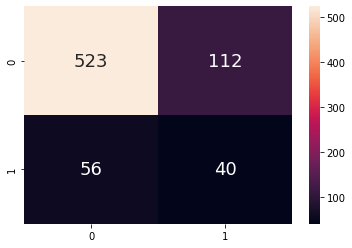

In [60]:
y_test_pred = bbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [75]:
print("Test Data")
print("Accuracy  :\t", bbc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

Test Data
Accuracy  :	 0.8782489740082079

TN rate Test :	 0.6232558139534884
FN rate Test :	 0.313953488372093

TP rate Test :	 0.686046511627907
FP rate Test :	 0.3767441860465116



Again, we see that this model yields a high Test Data Accuracy of 87.8%. This accuracy rating is also higher than that of the scikitlearn `DecisionTreeClassifier` models used earlier. 

However, the Test Data Accuracy had a slightly lower rating than that of the Train Data Accuracy. This is probably due to the larger data size in training data, allowing the bagging process to be more efficient in reducing the variance and biasness of the data.

We now proceed on to another model.

# BalancedRandomForestClassifier
The BalancedRandomForestClassifier is a model that randomly under-samples each bootstrap sample to balance it. It is similar to the `RandomForestClassifier` model from scikit-learn, but is more applicable to imbalanced data.

We can find out more at: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

We import the essential library.

> BalancedRandomForestClassifier: A balanced random forest classifier.

Note: Other neccessary libraries are already imported above.

In [62]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [69]:
y=pd.DataFrame(heart_dis_cln_ohe["HEART_STROKE"])
X=pd.DataFrame(heart_dis_cln_ohe.drop("HEART_STROKE", axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) #split the data into train:test=8:2

Create a `BalancedRandomForestClassifier` object with the following parameters:

- n_estimators: 100
- criterion=gini
- max_depth=None (nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples - 2 by default)
- sampling_strategy=auto
- random_state: None (the random number generator is the RandomState instance used by np.random)
- Leaving other parameters as default



# Train Data

We first fit the model using the **train** data.

In [70]:
brfc=BalancedRandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                                    sampling_strategy='auto', random_state=None)

brfc.fit(X_train, y_train.HEART_STROKE.ravel())

BalancedRandomForestClassifier()

Then, we predict the **train** data using the model that we have trained earlier. Below is the **heatmap of confusion matrix** to show what each box of the confusion matrix represents.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

<AxesSubplot:>

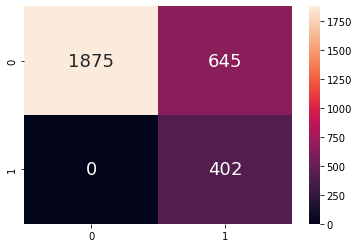

In [71]:
y_train_pred=brfc.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [72]:
print("Train Data")
print("Accuracy  :\t", brfc.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
TN = cmTrain[0][0]
TP = cmTrain[1][1]

FP = cmTrain[0][1]
FN = cmTrain[1][0]


print("TN rate Train :\t", (TN/(TN + FP)))
print("FN rate Train :\t", (FN/(FN + TP)))
print()

print("TP rate Train :\t", (TP/(TP + FN)))
print("FP rate Train :\t", (FP/(FP + TN)))
print()

Train Data
Accuracy  :	 0.7792607802874744

TN rate Train :	 0.7440476190476191
FN rate Train :	 0.0

TP rate Train :	 1.0
FP rate Train :	 0.25595238095238093



We see that the model yields a moderately high Train Data Accuracy of 77.9%. However, this accuracy rating is not as high as that of the `BalancedBaggerClassifier` model, `DecisionTreeClassifier` model and the `RandomForestClassifier` model.

Moreover, the variance and biasness of the data is very high, as seen in the extreme True Positive (TP) rate and False Negative (FN) rate.

# Test Data

Now, we proceed on to predict the **test** data using the model that we have trained earlier. 

Once again, below is the **heatmap of confusion matrix** to assist in showing what each box of the confusion matrix represents.

| Confusion Matrix  |       |        |     
| :---              | :---: | :----: |        
| Actual 0  |  TN  |  FP |            
| Actual 1  |  FN |  TP  |    
|                   | Predicted 0| Predicted 1|

<AxesSubplot:>

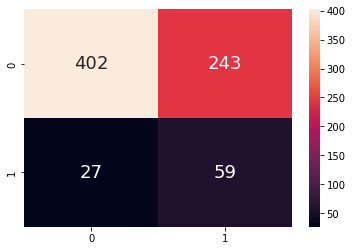

In [73]:
y_test_pred = brfc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [78]:
print("Test Data")
print("Accuracy  :\t", brfc.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
TN = cmTest[0][0]
TP = cmTest[1][1]

FP = cmTest[0][1]
FN = cmTest[1][0]


print("TN rate Test :\t", (TN/(TN + FP)))
print("FN rate Test :\t", (FN/(FN + TP)))
print()

print("TP rate Test :\t", (TP/(TP + FN)))
print("FP rate Test :\t", (FP/(FP + TN)))
print()

Test Data
Accuracy  :	 0.6306429548563611

TN rate Test :	 0.6232558139534884
FN rate Test :	 0.313953488372093

TP rate Test :	 0.686046511627907
FP rate Test :	 0.3767441860465116



We see that the model yields a moderate Test Data Accuracy of 63.1%. Moreover, this test data did not generate a higher data accuracy as the training data did. Similar to the explanation above, we believe this is due to the larger data size in training data, allowing the bagging process to be more efficient in reducing the variance and biasness of the data.

Not to mention, the Test Data Accuracy is also lower than that of  the `BalancedBaggerClassifier` model, `DecisionTreeClassifier` model and the `RandomForestClassifier` model as well.

# Overall comparison between BalancedBaggingClassifier & BalancedRandomForestClassifer

All in all, it seems that the BalancedBaggingClassifier model is more accurate than the RandomForestClassifier model. We can see that there is a higher Train & Test Data Accuracy for BalancedBaggingClassier (0.890 & 0.878 respectively) as compared to RandomForestClassifier (0.779 & 0.630 respectively).

# Overall comparison with models from the Machine Learning 1 folder

All in all, the two models from `imblearn` `ensemble` library used here perform relatively well. However, the `BalancedBaggingClassifier` model is definitely superior to the models used in the Machine Learning 1 notebook, as seen in the higher Data Accuracy Level for both training and test data.

On the other hand, the `BalancedRandomForestClassifier` model is definitely inferior to the models used in the Machine Learning 1 notebook, as seen in the lower Data Accuracy Level for both training and test data.